## Assignment 0 - Python Fundamentals
## Stevens Johnson
## A20244433

In [ ]:
# Problem 1: file  I/O  operations, dictionaries, Numpy arrays and visualization with Matplotlib

#Read file text.txt

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as mp
from collections import OrderedDict
import cv2

In [ ]:
# code for accessing google drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading text file
file_path = '/content/drive/My Drive/Colab Notebooks/Files/test.txt'
test = open(file_path)
dict = {}
for line in test:
  line = line.lower()
  for x in line:
    if x.isalpha():
      count = line.count(x) # Counting the frequency of the letter
      exist_count = dict.get(x,0) # Getting the previous count values, or returning a value of 0 if the key does not exist
      dict[x] = count + exist_count # Setting the key value pairs. 

In [ ]:
new_d = OrderedDict(sorted(dict.items(), key=lambda t: t[0])) # Sorting in alphabetical order using collections library
print(new_d)

OrderedDict([('a', 122), ('b', 28), ('c', 25), ('d', 60), ('e', 297), ('f', 22), ('g', 25), ('h', 33), ('i', 174), ('j', 25), ('k', 22), ('l', 34), ('m', 22), ('n', 44), ('o', 158), ('p', 33), ('q', 22), ('r', 124), ('s', 31), ('t', 88), ('u', 74), ('v', 22), ('w', 22), ('x', 22), ('y', 39), ('z', 25)])


In [ ]:
# Converting dictionary to a numpy array
values = new_d.values() # Getting the values of the dictionary
list_values = list(values) # Converting the values into a list
numArr = np.array(list_values) # Creating the numpy array with the values list
print(numArr)

[122  28  25  60 297  22  25  33 174  25  22  34  22  44 158  33  22 124
  31  88  74  22  22  22  39  25]


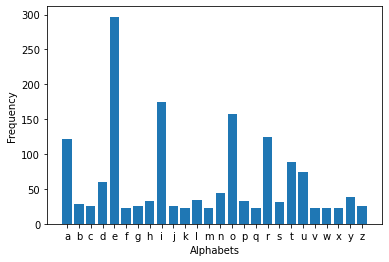

In [ ]:
# Unnormalized plotting
mp.bar(list(new_d.keys()), list_values) # Feeding the bar graph
mp.xlabel('Alphabets') 
mp.ylabel('Frequency')
mp.show() # Plotting

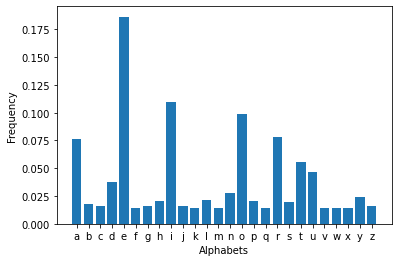

In [ ]:
sum = np.sum(numArr) # Taking the sum of the frequencies 

# Normalized plotting
norm_val_list = [x/sum for x in list_values] # Normalized list of freqeuncies by dividing each alphabet frequency with the sum
mp.bar(list(new_d.keys()), norm_val_list) # Feeding the bar graph with the normalized freqeucnies
mp.xlabel('Alphabets')
mp.ylabel('Frequency')
mp.show()

## Problem 2.1

In [ ]:
image_path = '/content/drive/My Drive/Colab Notebooks/Files/test.png'
image = cv2.imread(image_path) # Reading the file into a numpy array using cv2
points = np.array([[255, 0, 0],[0, 255, 0], [0, 0, 255]]) # Defining the points array to find the euclidean distance

In [ ]:
x_list = [*range(0,128,1)] # The list helps to iterate through the 3-D array to get the 1-D array to compute the euclidean distance with the points array
for x in x_list:
  for y in x_list:
    sum_1 = np.sum(np.square(image[x][y]-points[0])) # Doing (x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2 where x2,y2,z2 are from the image array and x1,y1,z1 are from the points array
    dist_1 = np.sqrt(sum_1) # Taking the square root to compute the euclidean distance
    sum_2 = np.sum(np.square(image[x][y]-points[1])) # Doing the same for the other two points
    dist_2 = np.sqrt(sum_2)
    sum_3 = np.sum(np.square(image[x][y]-points[2]))
    dist_3 = np.sqrt(sum_3)
    if dist_1 <= dist_2 and dist_1 <= dist_3:  # Finding the smallest of the three distances
      image[x][y] = points[0] # If the first distance is the smallest, then setting that pixel to [255,0,0]
    elif dist_2 < dist_1 and dist_2 < dist_3:
      image[x][y] = points[1] # If the second distance is the smallest, then setting the pixel to [0,255,0]
    else:
      image[x][y] = points[2] # If the third distance is the smallest, then setting the pixel to [0,0,255]

In [ ]:
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Files/output1.png', image) # Writing the file

True

## Problem 2.2

In [ ]:
# Find the centroid of the image
image_copy = cv2.imread(image_path)
height, width = image_copy.shape[0:2] # Find the width and height of the image
center_x = width//2 # The x-coordinate of the centroid is half of the width of the image
center_y = height//2 # The y-coordinate of the centroid is half of the height of the image

In [ ]:
# Draw a square around the centroid with color [0,0,0]
cv2.rectangle(image_copy, (center_x - 35,center_y + 35),(center_x + 35,center_y - 35), (0,0,0), -1) # Drawing a sqaure with the rectangle function
# Point 1 is the top left corner of the square. Length of 50 is achieved by taking 25 from the center to the left and up. By pythogorus theorem, 35.3 is obtained; rounding 35.
# Point 2 is the bottom right corner of the sqaure. Same distance of 35 can be used to reach the bottom right corner. 
# -1 thickness shades the region enclosed by the square

In [ ]:
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Files/output2.png', image_copy)

True

## Problem 3

In [ ]:
a = np.array([[3,3],[4,2]]) # Here the coefficients of x and y are entered into the array (a1.x + a2.y = z)
b = np.array([[11.25],[10.0]]) # Here the constants (z) are entered

print(np.linalg.solve(a,b)) # Using solve function to find the values of x and y.
# The cost of a soft taco is $1.25
# The cost of a burrito is $2.5

[[1.25]
 [2.5 ]]
